# Анализ собранного корпуса

Тетрадка со вспомогательными функциями для подсчёта разных статистик по собранным и размеченным данным

In [19]:
import pandas as pd
from pprint import pprint
from numpy import mean

In [3]:
df = pd.read_csv('distorted_toxicity.tsv', encoding='UTF-8', sep='\t')
df

,comment_id,source,comments,distortion,toxicity,corrected,Столбец1
0,0,медуза,Григорий Спел))),0,0,NaN,NaN
1,1,медуза,Только новую серию Намедни закончил смотреть и...,0,0,NaN,NaN
2,2,медуза,А будет ли фильм Русские русские?,0,0,NaN,NaN
3,3,медуза,"[id415480453|Олег], есть же, ""Цвет нации"".",0,0,NaN,NaN
4,4,медуза,Что бы ни делал Леонид Геннадьевич - шедеврально.,0,0,NaN,NaN
...,...,...,...,...,...,...,...
2995,2995,дождь,"[id138280294|Антон], не повторяйся бот",0,1,NaN,NaN
2996,2996,дождь,"[id49464409|Анатолий], Это констатация факта....",0,0,NaN,NaN
2997,2997,дождь,"[id138280294|Антон], утром методичку новую дали",0,0,NaN,NaN
2998,2998,дождь,"[id49464409|Анатолий], ага, Байден все делает ...",0,0,NaN,NaN


### Statistics

In [14]:
comments = df.comments.to_list()
toxic = df[df.toxicity == 1].comments.to_list()
nontoxic = df[df.toxicity == 0].comments.to_list()
distorted = df[df.distortion == 1].comments.to_list()
nondistorted = df[df.distortion == 0].comments.to_list()

In [35]:
from string import punctuation, digits

In [48]:
def count_data_statistics(all_data, first_class_list, second_class_list):
    """
    counts mean n of tokens, punctuation marks and digits in three given classes of text
    """
    all_lengths, first_cl_lengths, second_cl_lengths = [], [], []
    for text_list, len_list in zip([all_data, first_class_list, second_class_list],
                                     [all_lengths, first_cl_lengths, second_cl_lengths]):
        for comment in text_list:
            len_list.append(len(str(comment).split()))
    
    return {'mean tokens in all data': mean(all_lengths),
            'mean tokens in first class': mean(first_cl_lengths),
            'mean tokens in second class': mean(second_cl_lengths),
            'mean punctiation in all data': mean([sum([1 for char in str(text) if char in punctuation]) \
                                               for text in all_data]),
            'mean punctiation in first class': mean([sum([1 for char in str(text) if char in punctuation]) \
                                                  for text in first_class_list]),
            'mean punctiation in second class': mean([sum([1 for char in str(text) if char in punctuation]) \
                                                   for text in second_class_list]),
            'mean digits in all data': mean([sum([1 for char in str(text) if char in digits]) \
                                               for text in all_data]),
            'mean digits in first class': mean([sum([1 for char in str(text) if char in digits]) \
                                               for text in first_class_list]),
            'mean digits in second class': mean([sum([1 for char in str(text) if char in digits]) \
                                               for text in second_class_list])}

#### Count statistics for the first distortion + toxicity corpus

In [49]:
# mean elements
pprint(count_data_statistics(comments, toxic, nontoxic))
pprint(count_data_statistics(comments, distorted, nondistorted))

{'mean digits in all data': 5.352,
 'mean digits in first class': 5.606060606060606,
 'mean digits in second class': 5.293562935629356,
 'mean punctiation in all data': 6.417666666666666,
 'mean punctiation in first class': 7.590017825311943,
 'mean punctiation in second class': 6.148011480114802,
 'mean tokens in all data': 15.331333333333333,
 'mean tokens in first class': 18.83957219251337,
 'mean tokens in second class': 14.524395243952439}
{'mean digits in all data': 5.352,
 'mean digits in first class': 5.968253968253968,
 'mean digits in second class': 5.324982602644398,
 'mean punctiation in all data': 6.417666666666666,
 'mean punctiation in first class': 9.023809523809524,
 'mean punctiation in second class': 6.3034098816979816,
 'mean tokens in all data': 15.331333333333333,
 'mean tokens in first class': 19.77777777777778,
 'mean tokens in second class': 15.136395267919276}


In [6]:
# length in tokens
corrs = df.corrected.dropna().to_list()

rephrase = []
for corr in corrs:
    rephrase.extend(str(corr).split())
len(rephrase)

2524

In [7]:
len(tokens) + len(rephrase)

48518

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


distortion     0   1
toxicity            
0           2403  36
1            471  90


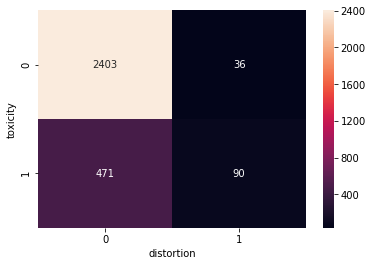

In [34]:
# class distribution

import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(df['toxicity'], df['distortion'], rownames=['toxicity'], colnames=['distortion'])
                               
print(confusion_matrix)

sn.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

#### Separate and save two parallel test datasets

In [9]:
source_df = df.loc[df['distortion'] == 1]
uncorrected_data = source_df[['comments', 'toxicity']]
corrected_data = source_df[['corrected', 'toxicity']]

In [10]:
source_df.head(1)

,comment_id,source,comments,distortion,toxicity,corrected,Столбец1
25,25,медуза,"[id695904995|Ярослав], как же обо%рался ОКР ко...",1,1,"[id695904995|Ярослав], как же обосрался ОКР ко...",NaN


In [11]:
uncorrected_data.to_csv('uncorrected_data_NEW.tsv', sep='\t')
corrected_data.to_csv('corrected_data_NEW.tsv', sep='\t')

#### Count statistics for second stage datasets

In [51]:
# vk distortion corpus
df2 = pd.read_csv('distortion_data.tsv', encoding='UTF-8', sep='\t')

all_texts = df2.text.to_list()
distorted = df2[df2.target == 1].text.to_list()
nondistorted = df2[df2.target == 0].text.to_list()

pprint(count_data_statistics(all_texts, distorted, nondistorted))
df2.target.value_counts()

{'mean digits in all data': 5.2427777777777775,
 'mean digits in first class': 5.291111111111111,
 'mean digits in second class': 5.194444444444445,
 'mean punctiation in all data': 7.441666666666666,
 'mean punctiation in first class': 9.124444444444444,
 'mean punctiation in second class': 5.7588888888888885,
 'mean tokens in all data': 19.590555555555557,
 'mean tokens in first class': 24.09777777777778,
 'mean tokens in second class': 15.083333333333334}


0    900
1    900
Name: target, dtype: int64

In [56]:
# vk toxicity corpus
df3 = pd.read_csv('toxicity_data.tsv', encoding='UTF-8', sep='\t')
df3.dropna(inplace=True)
all_texts = df3.text.to_list()
toxic = df3[df3.target == 1].text.to_list()
nontoxic = df3[df3.target == 0].text.to_list()

pprint(count_data_statistics(all_texts, toxic, nontoxic))
df3.target.value_counts()

{'mean digits in all data': 5.541594753192959,
 'mean digits in first class': 5.6541889483065955,
 'mean digits in second class': 5.5145547945205475,
 'mean punctiation in all data': 6.662754573696928,
 'mean punctiation in first class': 7.634581105169341,
 'mean punctiation in second class': 6.429366438356165,
 'mean tokens in all data': 15.894028305143252,
 'mean tokens in first class': 18.818181818181817,
 'mean tokens in second class': 15.191780821917808}


0    2336
1     561
Name: target, dtype: int64

In [62]:
# all data toxicity corpus
df4 = pd.concat([pd.read_csv('combined_train.tsv', encoding='UTF-8', sep='\t'),
                pd.read_csv('combined_val.tsv', encoding='UTF-8', sep='\t')],
                ignore_index=True)

all_texts = df4.doc.to_list()
toxic = df4[df4.target == 1].doc.to_list()
nontoxic = df4[df4.target == 0].doc.to_list()

pprint(count_data_statistics(all_texts, toxic, nontoxic))
df4.target.value_counts()

{'mean digits in all data': 0.65625,
 'mean digits in first class': 0.28067343173431736,
 'mean digits in second class': 1.0318265682656826,
 'mean punctiation in all data': 4.505419741697417,
 'mean punctiation in first class': 4.395987084870849,
 'mean punctiation in second class': 4.614852398523985,
 'mean tokens in all data': 16.516259225092252,
 'mean tokens in first class': 15.017758302583026,
 'mean tokens in second class': 18.014760147601475}


0    4336
1    4336
Name: target, dtype: int64